In [1]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [4]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.05)
    return cheb_high

def harmonic(n):
    return sum([1 / (i+1) for i in range(n)])

In [5]:
df = pd.read_csv("test_2.csv"); df

,n,min,max
0,1000,3,90
1,1000,5,90
2,1000,3,86
3,1000,1,111
4,1000,7,116
...,...,...,...
4995,50000,11,1153
4996,50000,6,860
4997,50000,3,607
4998,50000,3,644


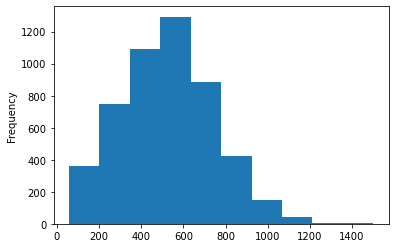

In [6]:
df["max"].plot.hist()

In [8]:
df.groupby("n")["max"].describe()

,count,mean,std,min,25%,50%,75%,max
n,,,,,,,,
1000,100.00,105.83,21.47,57.00,90.75,104.00,116.00,183.00
2000,100.00,150.16,34.78,82.00,127.00,145.50,172.00,248.00
3000,100.00,177.42,35.49,105.00,145.75,178.00,206.00,267.00
4000,100.00,219.33,56.22,132.00,174.00,214.00,254.75,420.00
5000,100.00,234.69,53.82,133.00,202.00,223.00,263.25,373.00
6000,100.00,261.07,57.54,151.00,222.75,250.00,300.25,502.00
7000,100.00,286.50,66.88,168.00,237.75,283.50,327.00,504.00
8000,100.00,312.46,66.85,191.00,266.50,305.50,346.50,526.00
9000,100.00,326.04,68.93,171.00,280.75,323.00,369.25,501.00


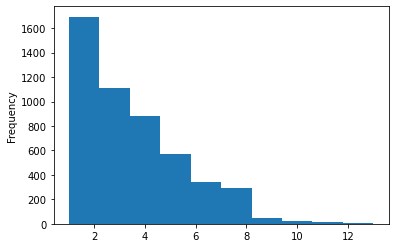

In [9]:
df["min"].plot.hist()

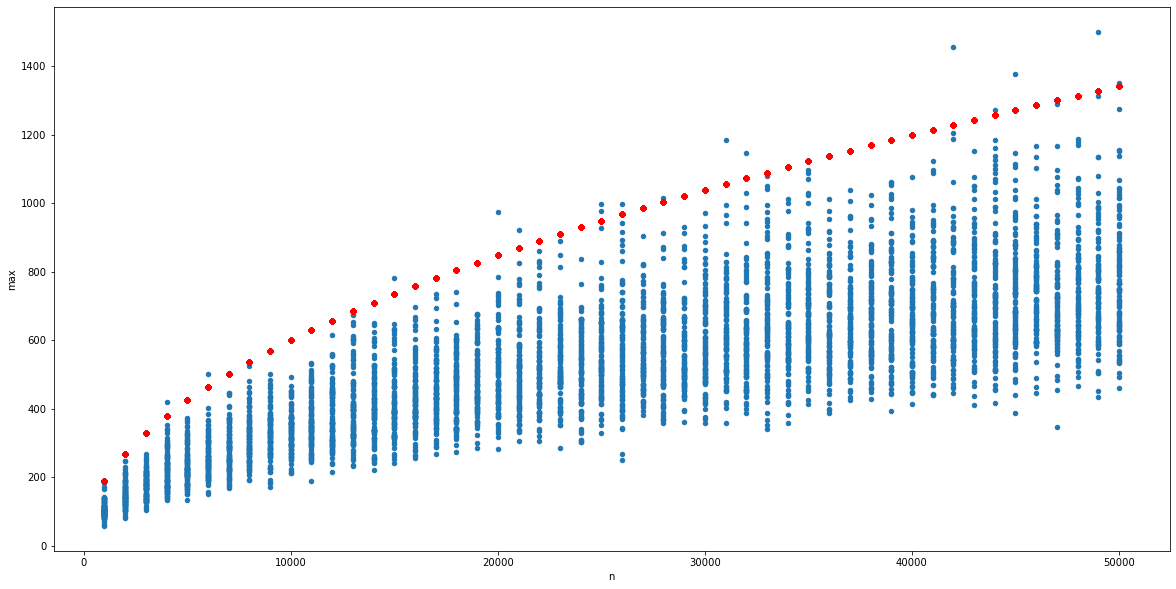

In [52]:
ax = df.plot.scatter(x="n", y="max", figsize=(10, 5))
df2 = pd.DataFrame({ "n": df["n"].values, "max": [6*np.sqrt(n) for n in df["n"].values]})
df2.plot.scatter(x="n", y="max", figsize=(20, 10), color="red", ax=ax)

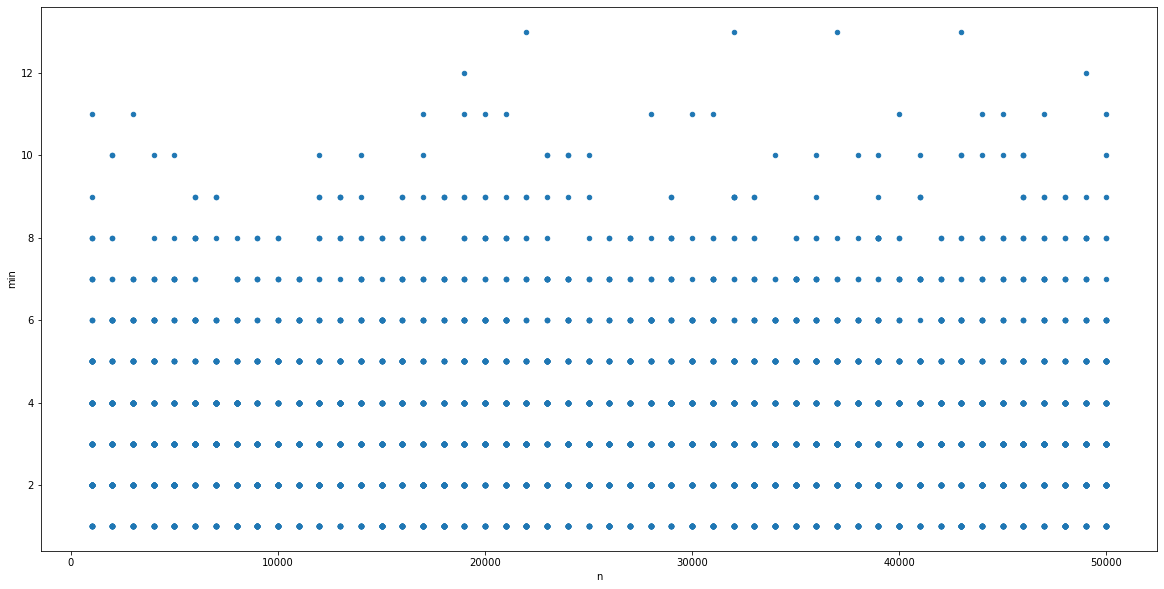

In [27]:
ax = df.plot.scatter(x="n", y="min", figsize=(20, 10))

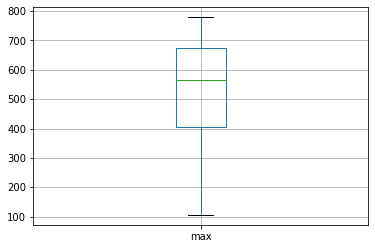

In [20]:
grouped = df.groupby(["n"])
grouped.mean().boxplot("max")

In [12]:
# grouped.plot()

In [21]:
grouped.mean()

,min,max
n,,
1000,3.61,105.83
2000,3.52,150.16
3000,3.52,177.42
4000,3.53,219.33
5000,3.19,234.69
6000,3.79,261.07
7000,3.40,286.50
8000,3.30,312.46
9000,2.97,326.04


# Max

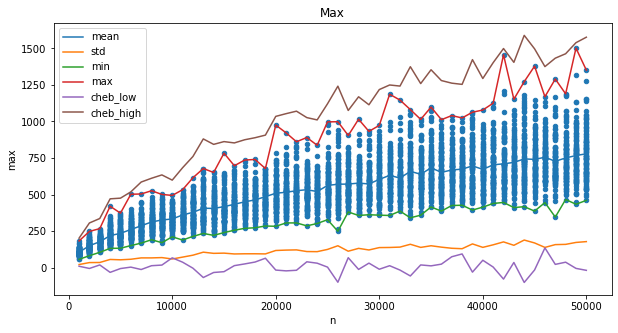

In [54]:
described = grouped["max"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
ax = described.plot(title="Max", figsize=(20,10))
df.plot.scatter(x="n", y="max", figsize=(10, 5), ax=ax)

# Empty
* Niech $Y$ będzie _liczbą pustych urn_
* Szukamy $\mathbb{E}[Y]$
* Niech $X_i$ będą zmiennymi indykatorowymi takimi że jeżeli $X_i = 1$ to _$i$-ta urna jest pusta_, $X_i = 0$ w p.p.

$$Y = X_1 + X_2 + \cdots + X_n$$

Problem sprowadza się do policzenia $\mathbb{E}[X_i]$ dla każdego $i$

$$E[Y] = E[X_1] + E[X_2] + \cdots + E[X_n]$$

Zatem z liniowości:

$$E[X_i] = 1 P(X_i = 1) + 0 P(X_i = 0) = P(X_i = 1) = P(\text{urna $i$ jest pusta}) = \left(1 - \frac{1}{n}\right)^m$$

ostatnia równość bierze się z tego że kule $1, 2, \ldots, m$ muszą wszystkie wpaść do urny różnej od $i$ - każde z prawdopodobieństwem $1 - \frac{1}{n}$.

Stąd

$$E[Y] = \sum_i^n \mathbb{E}[X_i] = \sum_i^n \mathbb{E}\left[\left(1 - \frac{1}{n}\right)^m\right] = n \left(1 - \frac{1}{n}\right)^m$$

Gdy $m = n$

$$E[Y] = n \left(1 - \frac{1}{n}\right)^n = \frac{n}{e}$$

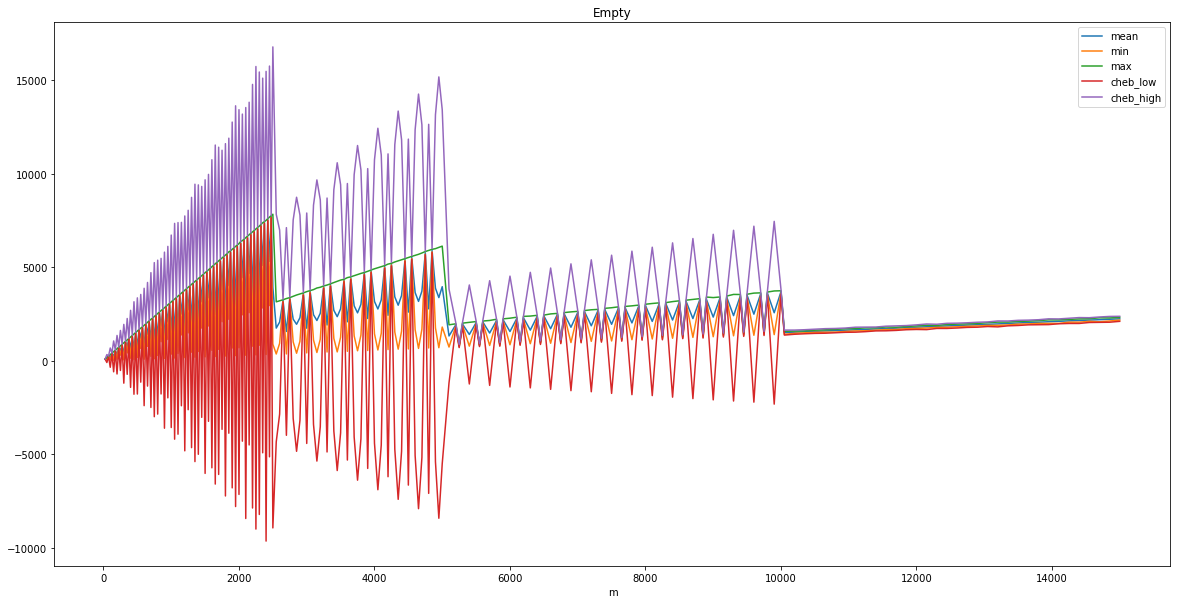

In [15]:
described = grouped["empty"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.drop(["std"], axis=1).plot(title="Empty", figsize=(20,10))